In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_dir=r'C:\Users\fehin\schlscrape_project\personal_project\Tuberculosis_prevalency\comprehensive_health_dataset_nigeria'
os.path.exists(data_dir) #checks whether or not the file path exists
data_dir_list=os.listdir(data_dir) #list of directory
selected_dataset=[each_data_dir for each_data_dir in data_dir_list if 'tuberculosis' in each_data_dir] #prints out every path with the specified string
selected_dataset

['tuberculosis-indicators-for-nigeria-47.csv']

In [3]:
selected_dataset_path=os.path.join(data_dir,'tuberculosis-indicators-for-nigeria-47.csv')
selected_dataset_path

'C:\\Users\\fehin\\schlscrape_project\\personal_project\\Tuberculosis_prevalency\\comprehensive_health_dataset_nigeria\\tuberculosis-indicators-for-nigeria-47.csv'

In [4]:
df=pd.read_csv(selected_dataset_path)
df.head()

,index,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),...,COUNTRY (CODE),COUNTRY (DISPLAY),COUNTRY (URL),Display Value,Numeric,Low,High,StdErr,StdDev,Comments
0,0,#indicator+code,#indicator+name,#indicator+url,#status+code,#status+name,NaN,NaN,#date+year,NaN,...,#country+code,#country+name,NaN,NaN,#indicator+value+num,NaN,NaN,NaN,NaN,NaN
1,1,TB_tot_newrel,Tuberculosis - new and relapse cases,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,1992.0,1992,NaN,...,NGA,Nigeria,NaN,14802,14802.00000,NaN,NaN,NaN,NaN,NaN
2,2,TB_tot_newrel,Tuberculosis - new and relapse cases,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,1994.0,1994,NaN,...,NGA,Nigeria,NaN,8449,8449.00000,NaN,NaN,NaN,NaN,NaN
3,3,TB_tot_newrel,Tuberculosis - new and relapse cases,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,1995.0,1995,NaN,...,NGA,Nigeria,NaN,13423,13423.00000,NaN,NaN,NaN,NaN,NaN
4,4,TB_tot_newrel,Tuberculosis - new and relapse cases,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,1997.0,1997,NaN,...,NGA,Nigeria,NaN,16660,16660.00000,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['index', 'GHO (CODE)', 'GHO (DISPLAY)', 'GHO (URL)',
       'PUBLISHSTATE (CODE)', 'PUBLISHSTATE (DISPLAY)', 'PUBLISHSTATE (URL)',
       'YEAR (CODE)', 'YEAR (DISPLAY)', 'YEAR (URL)', 'REGION (CODE)',
       'REGION (DISPLAY)', 'REGION (URL)', 'WORLDBANKINCOMEGROUP (CODE)',
       'STARTYEAR', 'ENDYEAR', 'WORLDBANKINCOMEGROUP (DISPLAY)',
       'WORLDBANKINCOMEGROUP (URL)', 'COUNTRY (CODE)', 'COUNTRY (DISPLAY)',
       'COUNTRY (URL)', 'Display Value', 'Numeric', 'Low', 'High', 'StdErr',
       'StdDev', 'Comments'],
      dtype='object')

In [6]:
df.describe()

,index,PUBLISHSTATE (URL),YEAR (CODE),YEAR (URL),REGION (URL),WORLDBANKINCOMEGROUP (URL),COUNTRY (URL),Low,High,StdErr,StdDev,Comments
count,671.000000,0.0,670.000000,0.0,0.0,0.0,0.0,188.000000,188.000000,0.0,0.0,0.0
mean,335.000000,NaN,2008.091045,NaN,NaN,NaN,NaN,76883.151596,148693.292553,NaN,NaN,NaN
std,193.845299,NaN,6.035947,NaN,NaN,NaN,NaN,123852.675670,215926.573535,NaN,NaN,NaN
min,0.000000,NaN,1990.000000,NaN,NaN,NaN,NaN,6.800000,15.000000,NaN,NaN,NaN
25%,167.500000,NaN,2004.000000,NaN,NaN,NaN,NaN,33.000000,95.000000,NaN,NaN,NaN
50%,335.000000,NaN,2009.000000,NaN,NaN,NaN,NaN,259.500000,415.500000,NaN,NaN,NaN
75%,502.500000,NaN,2013.000000,NaN,NaN,NaN,NaN,65500.000000,173000.000000,NaN,NaN,NaN
max,670.000000,NaN,2018.000000,NaN,NaN,NaN,NaN,450000.000000,740000.000000,NaN,NaN,NaN


In [7]:
#selecting the useful columns
df_tb_cleaned=df[['YEAR (CODE)','COUNTRY (DISPLAY)','Numeric']]

print(df_tb_cleaned.head())

   YEAR (CODE) COUNTRY (DISPLAY)               Numeric
0          NaN     #country+name  #indicator+value+num
1       1992.0           Nigeria           14802.00000
2       1994.0           Nigeria            8449.00000
3       1995.0           Nigeria           13423.00000
4       1997.0           Nigeria           16660.00000


In [8]:
#To rename the columns
df_tb_cleaned=df_tb_cleaned.rename(columns={
    'YEAR (CODE)':'Year',
    'COUNTRY (DISPLAY)':'Country',
    'Numeric': 'TB_Cases'
})
#To check for missing values
df_tb_cleaned.isnull().sum()

Year         1
Country      0
TB_Cases    20
dtype: int64

In [9]:
#To clean the dataset
df_tb_cleaned=df_tb_cleaned.iloc[1:].reset_index(drop=True) #drops the placeholder column
df_tb_cleaned['Year']=df_tb_cleaned['Year'].astype(int) #Converts year to integer
df_tb_cleaned=df_tb_cleaned.dropna(subset=['Year','TB_Cases','Country']) #drop missing values
df_tb_cleaned['TB_Cases']=df_tb_cleaned['TB_Cases'].astype(float).astype(int) 
df_tb_cleaned['TB_Cases']=pd.to_numeric(df_tb_cleaned['TB_Cases'],errors='coerce')
df_tb_cleaned['Year']=pd.to_numeric(df_tb_cleaned['Year'],errors='coerce')
df_tb_cleaned
    

,Year,Country,TB_Cases
0,1992,Nigeria,14802
1,1994,Nigeria,8449
2,1995,Nigeria,13423
3,1997,Nigeria,16660
4,2001,Nigeria,20387
...,...,...,...
665,2015,Nigeria,20
666,2013,Nigeria,19
667,2008,Nigeria,20
668,2006,Nigeria,20


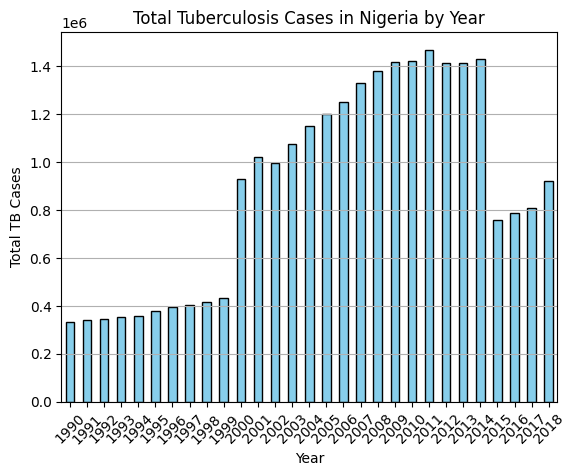

In [10]:
#Visualization using bar chart
df_yearly_tb = df_tb_cleaned.groupby('Year')['TB_Cases'].sum()
df_yearly_tb.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Tuberculosis Cases in Nigeria by Year')
plt.xlabel('Year')
plt.ylabel('Total TB Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [11]:
data_dir
data_dir_list=os.listdir(data_dir) #list of directory
data_dir_list

['.ipynb_checkpoints',
 'all-health-indicators-for-nigeria-48.csv',
 'child-health-indicators-for-nigeria-26.csv',
 'demographic-and-socioeconomic-statistics-indicators-for-nigeria-34.csv',
 'essential-health-technologies-indicators-for-nigeria-41.csv',
 'financial-protection-indicators-for-nigeria-28.csv',
 'health-equity-monitor-indicators-for-nigeria-40.csv',
 'health-financing-indicators-for-nigeria-4.csv',
 'health-systems-indicators-for-nigeria-7.csv',
 'health-workforce-indicators-for-nigeria-25.csv',
 'hiv-aids-and-other-stis-indicators-for-nigeria-44.csv',
 'icd-indicators-for-nigeria-42.csv',
 'infectious-diseases-indicators-for-nigeria-21.csv',
 'injuries-and-violence-indicators-for-nigeria-18.csv',
 'insecticide-resistance-indicators-for-nigeria-5.csv',
 'international-health-regulations-2005-monitoring-framework-indicators-for-nigeria-23.csv',
 'malaria-indicators-for-nigeria-2.csv',
 'medical-equipment-indicators-for-nigeria-37.csv',
 'millennium-development-goals-mdgs-in

In [12]:
df_data = []  # Store TB-relevant files

for each_dataset in os.listdir(data_dir):
    selected_dataset_path = os.path.join(data_dir, each_dataset)
    
    try:
        df_each_dataset_list = pd.read_csv(selected_dataset_path, low_memory=False)
        
        # Check if target column exists
        if 'GHO (DISPLAY)' in df_each_dataset_list.columns:
            filtered_df = df_each_dataset_list[
                df_each_dataset_list['GHO (DISPLAY)'].str.contains('tuberculosis', case=False, na=False, regex=True)
            ]
            
            if not filtered_df.empty:
                print(f'This file {each_dataset} contains Tuberculosis-related content')
                df_data.append(each_dataset)
            else:
                print('This file doesnt contain Tuberculosis related content')
        else:
            print(f'Skipping {each_dataset} – missing column: GHO (DISPLAY)')
    
    except Exception as e:
        print(f'Error processing {each_dataset}: {e}')

Error processing .ipynb_checkpoints: [Errno 13] Permission denied: 'C:\\Users\\fehin\\schlscrape_project\\personal_project\\Tuberculosis_prevalency\\comprehensive_health_dataset_nigeria\\.ipynb_checkpoints'
This file all-health-indicators-for-nigeria-48.csv contains Tuberculosis-related content
This file doesnt contain Tuberculosis related content
This file doesnt contain Tuberculosis related content
This file doesnt contain Tuberculosis related content
This file doesnt contain Tuberculosis related content
This file doesnt contain Tuberculosis related content
This file doesnt contain Tuberculosis related content
This file doesnt contain Tuberculosis related content
This file doesnt contain Tuberculosis related content
This file doesnt contain Tuberculosis related content
This file doesnt contain Tuberculosis related content
This file infectious-diseases-indicators-for-nigeria-21.csv contains Tuberculosis-related content
This file doesnt contain Tuberculosis related content
This file do

In [13]:
df_data

['all-health-indicators-for-nigeria-48.csv',
 'infectious-diseases-indicators-for-nigeria-21.csv',
 'tuberculosis-indicators-for-nigeria-47.csv']

In [14]:
for each_file in df_data:
    selected_dataset_path = os.path.join(data_dir, each_file)
    df_each_file = pd.read_csv(selected_dataset_path)
    
    # Filter for TB-related rows
    df_ = df_each_file[df_each_file['GHO (DISPLAY)'].str.contains('tuberculosis', case=False, na=False)]
    
    # Select and clean columns
    df_cleaned = df_[['GHO (DISPLAY)', 'Numeric', 'COUNTRY (DISPLAY)', 'YEAR (DISPLAY)']]
    df_cleaned = df_cleaned.iloc[1:].reset_index(drop=True)
    df_cleaned = df_cleaned.rename(columns={
        'GHO (DISPLAY)': 'Indicator_name',
        'Numeric': 'Numeric_value',
        'COUNTRY (DISPLAY)': 'Country',
        'YEAR (DISPLAY)': 'Year'
    })
    
    # Clean the Year column
    df_cleaned['Year'] = df_cleaned['Year'].str.split('-').str[0]
    df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'], errors='coerce')
    
    # Drop rows with missing values
    df_cleaned = df_cleaned.dropna(subset=['Indicator_name', 'Numeric_value', 'Country', 'Year'])
    
    # Convert Numeric values
    df_cleaned['Numeric_value'] = pd.to_numeric(df_cleaned['Numeric_value'], errors='coerce')
    df_cleaned['Numeric_value'] = df_cleaned['Numeric_value'].astype(float).astype(int)
    
    # Save only the cleaned TB-related file
    df_cleaned.to_csv(f'cleaned_{each_file}', index=False, encoding='utf-8')
print('Relevant TB files saved.')


C:\Users\fehin\AppData\Local\Temp\ipykernel_9296\948873649.py:3: DtypeWarning: Columns (4,5,14,15,30,31,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_each_file = pd.read_csv(selected_dataset_path)


Relevant TB files saved.
